<a href="https://colab.research.google.com/github/JaydenLee1116/Project1_Next-Quarter-Game-Design-Prediction/blob/main/AI_09_%EC%9D%B4%EC%9E%AC%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트

상황 : 게임회사 데이터팀 합류

문제 : '다음 분기에 어떤 게임을 설계해야할까'

발표(협업) 대상 : '비데이터 직군'

발표 시간 : 8분 이내

### 반드시 들어가야하는 내용
1. "지역에 따라서 선호하는 게임 장르가 다를까"
2. "연도 별 게임의 트랜드가 있을까"("연도에 따라서 선호하는 게임 장르가 있을까"
3. "출고량이 높은 게임에 대한 분석 및 시각화 과정"

### Data Description
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.


### Section1에서 배웠던 내용
- sprint1 : Exploratory Data Analysis, Feature Engineering, Data Manipulation, Data Visualization
- sprint2 : Hypothesis test, Confidence Interval, Bayesian
- sprint3 : Dimension Reduction, Principal Component Analysis, Cluster

### 간단한 가정

- 출고량 : 제작사가 상품을 생산한 개수(중간 도소매업자에게 넘어간 양)
- 판매량 : 실제 상품을 (최종)소비자에게 판매가 된 개수

가정1 : "출고된 게임은 전부 소비자에게 판매가 되었다.('출고량' == '판매량')"

가정2 : "각 지역 별 출고된 상품들은 그 지역의 소비자에게 판매가 되었다."

가정3 : "판매량과 소비자의 게임 선호도는 양의 관계를 따른다."

데이터가 한정적이기에 위의 가정들을 두고 분석을 진행하겠습니다.

### 0. 기본 EDA(데이터 살펴보기) 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
df = pd.read_csv('/content/vgames2.csv')

In [ ]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.shape

(16598, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True) # 첫열의 의미없는 순서는 제거하였습니다.

In [ ]:
df = df.reset_index(drop=True) # 인덱스를 리셋하여 정리하였습니다.

In [ ]:
# 각 컬럼에 대한 표기법 기준을 맞추는 작업을 하겠습니다. 먼저 시각적으로 '숫자'인 데이터부터 정리해보겠습니다.

In [ ]:
df['Year'].drop_duplicates().values # 값들을 보니, 네자리로 되어있는 것과 두자리로 되어있는 것(100 이하)으로 표기가 다릅니다. 이걸 네자리로 맞춰주겠습니다.

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03,       nan,
       1.984e+03, 1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00,
       9.700e+01, 1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03,
       1.100e+01, 1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03,
       1.983e+03, 1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01,
       6.000e+00, 8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00,
       1.000e+01, 9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01,
       9.500e+01, 2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01,
       0.000e+00, 1.200e+01, 9.400e+01])

In [ ]:
df[df['Year'] < 100]['Year'].drop_duplicates().values # 50을 기준으로 앞에 19와 20을 붙이겠습니다.

array([ 9., 97., 11., 15.,  3., 96.,  6.,  8.,  1.,  5.,  4., 10., 98.,
        7., 16., 86., 14., 95.,  2., 13.,  0., 12., 94.])

In [ ]:
def distinguish_year(value) :
  if value < 100 :
    if value > 50 :
      return value + 1900
    else:
      return value + 2000
  else:
    return value

In [ ]:
df['Year'] = df.Year.apply(distinguish_year) # 'Year' 컬럼 천단위 숫자로 통일 완료

In [ ]:
df['NA_Sales'].drop_duplicates().values # 살펴보니 일단 소수점 단위는 M(100만)이므로 안에 K가 있는 애들은 K 제거 후 곱하기 1000, M이 있는 애들은 M 제거 후 곱하기 10^6, 나머지는 그냥 곱하기 10^6

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

In [ ]:
def clean_sales_km(value):
  if 'M' in value:
    return float(value.replace('M', '')) * (10**6)
  elif 'K' in value:
    return float(value.replace('K','')) * (10**3)
  else:
    return float(value) * (10**6)

In [ ]:
df.NA_Sales = df.NA_Sales.apply(clean_sales_km)
df.EU_Sales = df.EU_Sales.apply(clean_sales_km)
df.JP_Sales = df.JP_Sales.apply(clean_sales_km)
df.Other_Sales = df.Other_Sales.apply(clean_sales_km)

In [ ]:
df.head() # 일단 기본적인 데이터 단위 전처리는 완료하였습니다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


In [ ]:
df[df['Name'] == 'Imagine: Makeup Artist']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,270000.0,0.0,0.0,20000.0


In [ ]:
df.iloc[6906,2] = 2009 # 아래에서 분석을 더 진행 중, 이 게임이 혼자 2020년 출시로 이상하여 서치해보니 2009년 게임이었습니다. 해서 수정합니다.

#### 이상치 및 결측치 처리

In [ ]:
df.isna().sum() # 일단 다행히 출고량 데이터에는 결측치가 따로 없음을 확인하였고, 약 16,000개의 데이터 중 300개 미만의 데이터는 미비하다 생각하여 단순 제거를 하려 하였으나, 출고량이 높은 상품의 경우엔 영향력이 있을 것이라 판단하였습니다.

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 해서, 게임 별 총 출고량을 구하고 총 출고량의 평균값 이상인 데이터에 대해서는 결측치를 최대한 채워보았습니다.

In [ ]:
df['Total_Sales'] = df.loc[:,'NA_Sales':].sum(axis=1) # 게임 별 총 출고량 컬럼 추가

In [ ]:
df.sort_values('Total_Sales', ascending=False, inplace=True) # 총 출고량이 높은 순으로 정리

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [ ]:
df_temp = df[df['Total_Sales'] >= df['Total_Sales'].mean()] # df_temp로 저장해두고 결측치를 채웠습니다.

In [ ]:
df_temp.isna().sum() 

Name            0
Platform        0
Year           50
Genre          18
Publisher       6
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64

In [ ]:
df_temp_yearna = df_temp[df_temp['Year'].isna()]

In [ ]:
df_temp_yearna['Year'] = np.array([2003, 2004, 2008, 2005, 1978, 2007, 2001, 2008, 2006, 2008, 2010, 2007, 1998, 2011, 2008, 1979, 1977, 2002, 2002, 2007, 1999, 1997, 2011, 2002, 1982, 2011, 2010, 2003, 1999, 2008, 2011, 2011, 2006, 2002, 2008,
                                   2008, 2010, 2004, 2011, 2011, 2007, 2011, 2006, 2008, 2002, 2007, 2005, 2001, 2002, 2004])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_temp[df_temp['Year'].isna()] = df_temp_yearna ## df_temp['Year']에 결측치 채우기 완

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
df_temp.isna().sum()

Name            0
Platform        0
Year            0
Genre          18
Publisher       6
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64

In [ ]:
df_temp_genre = df_temp[df_temp['Genre'].isna()]

In [ ]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', nan, 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
df_temp_genre

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
32,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170000.0,4050000.0,4340000.0,790000.0,14350000.0
77,Wii Party,Wii,2010.0,NaN,Nintendo,1790000.0,3530000.0,2490000.0,680000.0,8490000.0
147,Final Fantasy XII,PS2,2006.0,NaN,Square Enix,1880000.0,0.0,2330000.0,1740000.0,5950000.0
554,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,990000.0,480000.0,1090000.0,140000.0,2700000.0
661,Bloodborne,PS4,2015.0,NaN,Sony Computer Entertainment,1000000.0,760000.0,260000.0,360000.0,2380000.0
702,Need for Speed Underground 2,XB,2004.0,NaN,Electronic Arts,1380000.0,800000.0,0.0,100000.0,2280000.0
935,Chrono Cross,PS,1999.0,NaN,SquareSoft,620000.0,420000.0,690000.0,120000.0,1850000.0
1455,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1100000.0,60000.0,0.0,180000.0,1340000.0
1825,Yakuza 3,PS3,2009.0,NaN,Sega,210000.0,210000.0,620000.0,80000.0,1120000.0
1857,F-Zero X,N64,1998.0,NaN,Nintendo,450000.0,330000.0,290000.0,30000.0,1100000.0


In [ ]:
df_temp_genre['Genre'] = np.array(['Role-Playing', 'Puzzle', 'Role-Playing', 'Action', 'Role-Playing', 'Racing', 'Role-Playing', 'Sports', 'Action', 'Racing', 'Adventure', 'Adventure', 'Action', 'Puzzle', 'Platform', 'Sports', 'Action', 'Fighting'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_temp[df_temp['Genre'].isna()] = df_temp_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
df_temp.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      6
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [ ]:
df_temp_pub = df_temp[df_temp['Publisher'].isna()]

In [ ]:
df_temp[df_temp['Publisher'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
470,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1570000.0,1020000.0,0.0,410000.0,3000000.0
1304,Triple Play 99,PS,1998.0,Sports,NaN,810000.0,550000.0,0.0,100000.0,1460000.0
1653,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,870000.0,320000.0,0.0,20000.0,1210000.0
2214,Bentley's Hackpack,GBA,2005.0,Misc,NaN,670000.0,250000.0,0.0,20000.0,940000.0
3164,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,460000.0,170000.0,0.0,10000.0,640000.0
3165,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,460000.0,170000.0,0.0,10000.0,640000.0


In [ ]:
df_temp_pub['Publisher'] = np.array(['THQ', 'Electronic Arts', 'Nintendo', 'Sony Computer Entertainment', 'Nintendo', 'THQ'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_temp[df_temp['Publisher'].isna()] = df_temp_pub

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
df_temp.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [ ]:
df_temp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...
3744,ModNation Racers,PSP,2010.0,Racing,Sony Computer Entertainment,110000.0,270000.0,20000.0,140000.0,540000.0
3745,Mat Hoffman's Pro BMX,PS,2001.0,Sports,Activision,300000.0,200000.0,0.0,40000.0,540000.0
3746,Time Crisis: Razing Storm,PS3,2010.0,Shooter,Namco Bandai Games,180000.0,210000.0,70000.0,80000.0,540000.0
3747,World Soccer Winning Eleven 7 International (J...,PS2,2004.0,Sports,Konami Digital Entertainment,0.0,0.0,540000.0,0.0,540000.0


In [ ]:
df.iloc[:3749,:] = df_temp

In [ ]:
df.isna().sum() # 총 출고량이 전체 게임들의 평균보다 높은 값들에 대해서는 모든 결측치를 채워주었습니다. 이제 나머지 하위 결측치들은 그냥 제거하겠습니다.

Name             0
Platform         0
Year           221
Genre           32
Publisher       52
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16313.000000,1.631300e+04,1.631300e+04,1.631300e+04,1.631300e+04,1.631300e+04
mean,2006.397291,2.676344e+05,1.486164e+05,7.891375e+04,4.873782e+04,5.439024e+05
std,5.840082,8.233479e+05,5.094758e+05,3.118164e+05,1.901486e+05,1.567730e+06
min,1977.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+04
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04,1.700000e+05
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04,4.900000e+05
max,2017.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07,8.274000e+07


In [ ]:
df.describe(include='O')

,Name,Platform,Genre,Publisher
count,16313,16313,16313,16313
unique,11325,31,12,575
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts
freq,12,2135,3260,1344


In [ ]:
# 이상치에 대한 명확한 근거가 없어 따로 제거하진 않았습니다. (기본적으로 0인 값이 많아 아주 높은 값이 이상치로 구분되는데, 실제 그 값을 가진 게임 목록을 살펴보니 대외적으로 그만큼 출고가 되었겠다 싶은 게임들이라 두었습니다.)

### 1. 지역에 따라서 선호하는 게임 장르가 다를까?

- 가설 검정
  - 지역과 장르라는 두 변수에 대한 연관성을 묻고 있습니다.
  - 2 sample 카이 제곱검정 적용
  - 귀무가설(H0) : 지역과 장르는 독립이다.(연관이 없다.)
  - 대립가설(H1) : 지역과 장르는 연관이 있다.

- 시각화


In [ ]:
df1 = df[['Genre', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales', 'Total_Sales']]

In [ ]:
df1.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Sports,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,Platform,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,Racing,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,Sports,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,Role-Playing,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [ ]:
df1_cat = df1.groupby('Genre').sum()

In [ ]:
df1_cat # 각 나라 별 출고량을 선호도라고 생각하겠습니다. 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,871030000.0,520690000.0,158950000.0,186570000.0,1.737240e+09
Adventure,105510000.0,65230000.0,51870000.0,17080000.0,2.396900e+08
Fighting,222740000.0,101120000.0,87150000.0,36620000.0,4.476300e+08
Misc,403540000.0,210900000.0,104950000.0,73850000.0,7.932400e+08
Platform,446580000.0,200950000.0,130650000.0,51540000.0,8.297200e+08
Puzzle,123730000.0,54110000.0,59670000.0,13160000.0,2.506700e+08
Racing,357870000.0,237500000.0,56620000.0,77060000.0,7.290500e+08
Role-Playing,327720000.0,188550000.0,351560000.0,59820000.0,9.276500e+08
Shooter,579520000.0,312080000.0,38180000.0,102370000.0,1.032150e+09


In [ ]:
from scipy.stats import chi2_contingency

_, Pvalue1, _, _ = chi2_contingency(df1_cat.iloc[:,:4])

In [ ]:
print(f'two-sample 카이제곱 검정 결과, pvalue가 {Pvalue1}으로 0.05보다 작으므로 귀무가설을 기각합니다. 따라서, 게임 장르와 지역은 연관이 있습니다.')

two-sample 카이제곱 검정 결과, pvalue가 0.0으로 0.05보다 작으므로 귀무가설을 기각합니다. 따라서, 게임 장르와 지역은 연관이 있습니다.


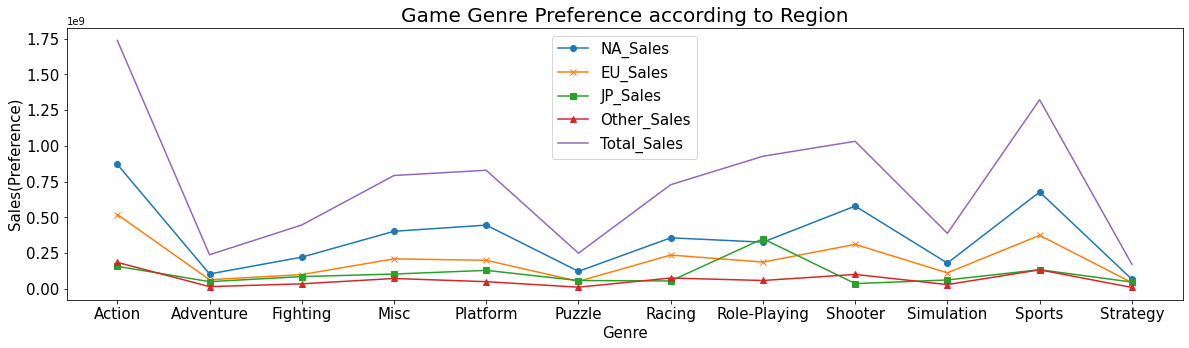

In [ ]:
plt.figure(figsize=(20,5))

plt.title('Game Genre Preference according to Region', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales(Preference)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot(df1_cat['NA_Sales'], label='NA_Sales', marker='o')
plt.plot(df1_cat['EU_Sales'], label='EU_Sales', marker='x')
plt.plot(df1_cat['JP_Sales'], label='JP_Sales', marker='s')
plt.plot(df1_cat['Other_Sales'], label='Other_Sales', marker='^')
plt.plot(df1_cat['Total_Sales'], label='Total_Sales', marker='')

plt.legend(fontsize=15)
plt.show();

In [ ]:
# 먼저 총 출고량(보라색)을 보았을 때, 액션이 압도적으로 높은 것을 알 수 있고 그 뒤로 스포츠, 슈터 등이 따라오는 것을 확인할 수 있습니다.
# 지역별 출고량을 살펴보면, 전반적으로 거의 모든 장르에서 북미 시장의 규모가 타 지역대비 큰 것을 알 수 있었고(다음으로 유럽) 유일하게 롤플레잉 장르에서만 일본이 북미보다 아주 근소한 차이로 앞서고 있습니다.
# (단, 우리는 여기서 북미, 유럽, 그외 출고량은 여러 국가가 합쳐진 단위이지만 JP는 말그대로 '일본' 한 국가만의 출고량임을 기억해야합니다.)
# 단순하게 생각해본다면 우리는 북미 및 유럽시장을 타겟팅으로 하고, 장르는 액션/스포츠/슈터 순으로 접근해야할 것이라 생각이 듭니다.

In [ ]:
# 장르 별 지역에서 차지하는 출고량을 스케일링하는 개념으로 각 장르의 지역 별 출고량을 총 출고량으로 나누어 '비율'을 비교해보겠습니다.

In [ ]:
df1_cat_pro = df1_cat.iloc[:,:4]
for i in range(len(df1_cat.index)):
  df1_cat_pro.iloc[i,:] = df1_cat.iloc[i, :] / df1_cat.iloc[i, :].sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1_cat_pro['Total_Sales'] = df1_cat_pro.sum(axis=1)

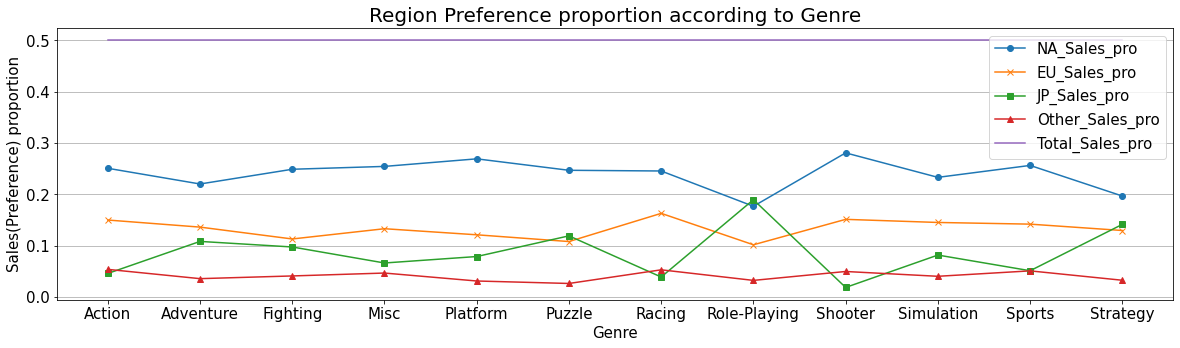

In [ ]:
plt.figure(figsize=(20,5))

plt.title('Region Preference proportion according to Genre', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales(Preference) proportion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(b=True, axis='y')
plt.plot(df1_cat_pro['NA_Sales'], label='NA_Sales_pro', marker='o')
plt.plot(df1_cat_pro['EU_Sales'], label='EU_Sales_pro', marker='x')
plt.plot(df1_cat_pro['JP_Sales'], label='JP_Sales_pro', marker='s')
plt.plot(df1_cat_pro['Other_Sales'], label='Other_Sales_pro', marker='^')
plt.plot(df1_cat_pro['Total_Sales'], label='Total_Sales_pro', marker='')

plt.legend(fontsize=15)
plt.show();

In [ ]:
# 각 장르 별 비교를 위한 스케일링 작업과 비슷하다 보시면 되겠습니다. 여기서 눈에 띄는 점은 슈터 장르가 총 출고량 중 비율적으로는 북미시장에서 1위라는 점입니다. 
# 이를 통해 이전 그래프에서 보았을 땐, 단순하게 액션과 스포츠 장르를 타겟팅하는 게 유의미하다 보았지만 각 장르의 지역 별 출고량 비율로 확인하였을 때는 슈터 장르가 북미에서 우세를 보이고 있음을 확인하였습니다.
# 그러나 이 자료만을 통해 특정지을 수는 없기에 우선은 북미, 유럽 시장 그리고 슈터, 액션, 스포츠 장르의 우세라는 점만 생각하고 가겠습니다.

### 2. 연도 별 게임의 트랜드가 있을까(연도에 따라서 선호하는 게임 장르가 있을까)
- 가설 검정
  - 연도와 장르라는 두 변수에 대한 연관성을 묻고 있습니다.
  - 2 sample 카이 제곱검정 적용
  - 귀무가설(H0) : 연도와 장르는 독립이다.(연관이 없다.)
  - 대립가설(H1) : 연도와 장르는 연관이 있다.

- 시각화



In [ ]:
df2 = df[['Year', 'Genre', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

In [ ]:
df2['Total_Sales'] = df2.loc[:,'NA_Sales' : 'Other_Sales'].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2 = df2[['Year', 'Genre', 'Total_Sales']]

In [ ]:
df2.head()

,Year,Genre,Total_Sales
0,2006.0,Sports,82740000.0
1,1985.0,Platform,40240000.0
2,2008.0,Racing,35830000.0
3,2009.0,Sports,33000000.0
4,1996.0,Role-Playing,31380000.0


In [ ]:
df2_cat = df2.pivot_table(values='Total_Sales', index='Year', columns='Genre', aggfunc='sum') # 연도에 따른 각 장르 별 출고량(wide 데이터) 

In [ ]:
df2_cat.fillna(0, inplace=True) # nan은 어차피 출고량이 없다는 뜻이므로 0으로 바꿔주겠습니다.

In [ ]:
df2_cat.drop(index=2017.0, inplace=True)

In [ ]:
from scipy.stats import chi2_contingency

_, Pvalue2, _, _ = chi2_contingency(df2_cat)

In [ ]:
print(f'two-sample 카이제곱 검정 결과, pvalue가 {Pvalue2}으로 0.05보다 작으므로 귀무가설을 기각합니다. 따라서, 게임 장르와 연도는 연관이 있습니다.')

two-sample 카이제곱 검정 결과, pvalue가 0.0으로 0.05보다 작으므로 귀무가설을 기각합니다. 따라서, 게임 장르와 연도는 연관이 있습니다.


In [ ]:
len(df2_cat.columns)

12

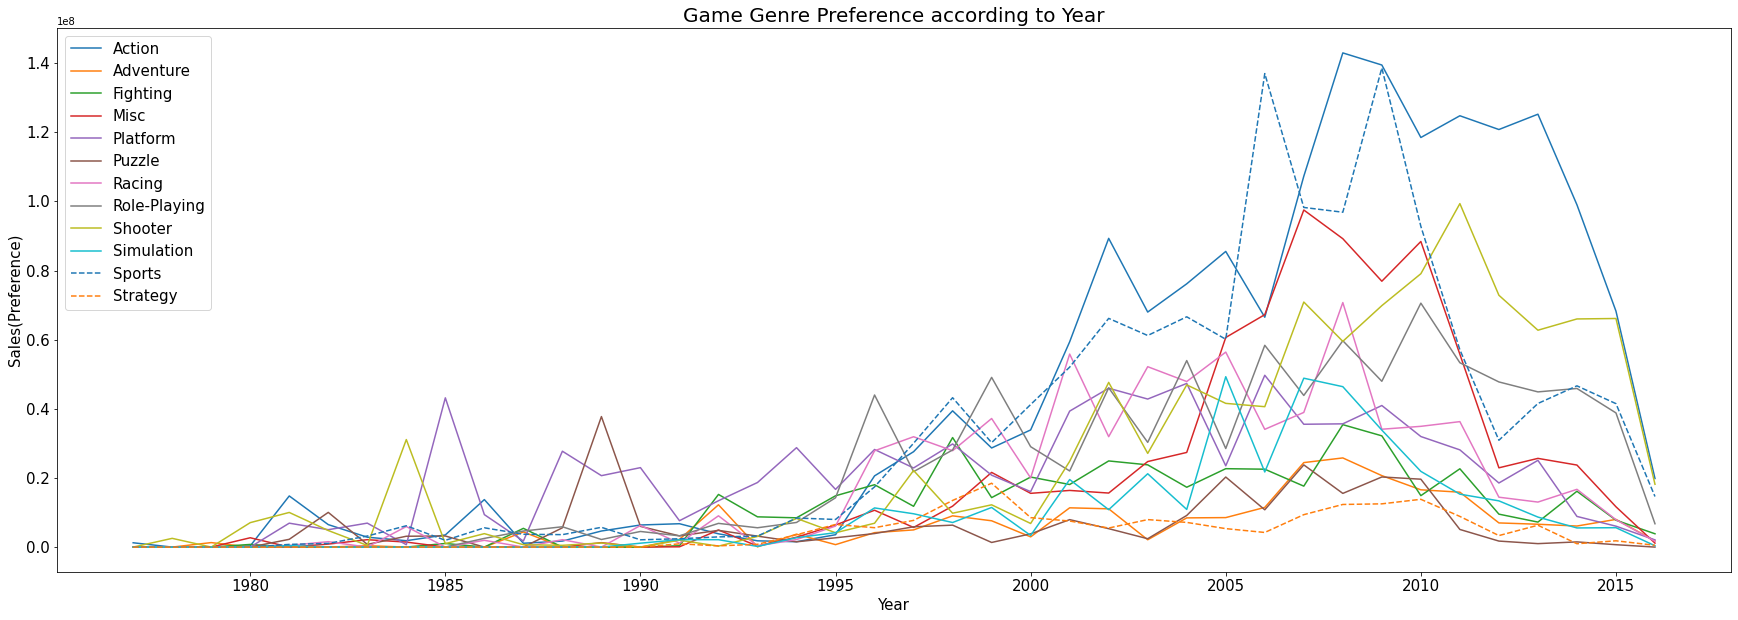

In [ ]:
plt.figure(figsize=(30,10))

plt.title('Game Genre Preference according to Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales(Preference)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


for i in range(len(df2_cat.columns)-2):
  plt.plot(df2_cat.iloc[:,i], label=df2_cat.columns[i])
plt.plot(df2_cat.iloc[:,10], label=df2_cat.columns[10], ls='--')
plt.plot(df2_cat.iloc[:,11], label=df2_cat.columns[11], ls='--') # 선의 색깔이 겹쳐서 점선으로 따로 plot 해주었습니다.

plt.legend(fontsize=15)
plt.show();

In [ ]:
# 12개의 장르를 한번에 보려다보니 다소 어지러운 것은 사실입니다. 다만, 2000년을 기점으로 전반적인 비디오 게임 출고량은 지속 상승하여 약 2009년에 최고점을 달성한 것을 확인할 수 있었습니다.
# 이에 대한 분석 또한 진행되어야겠으나, 이번 프로젝트에서 메인으로 다루는 부분이 아닌만큼 간단한 정보를 서치해보았습니다. 2007년 애플이 (우리가 지금 현재 생각하는) 스마트폰을 출시하며 모바일 생태계에 급격한 변화를 주었습니다.
# 이 스마트폰의 보급이 비디오게임 시장에도 영향을 준 가장 큰 이유는 애플의 스마트폰이 가진 '스토어' 즉, 누구나 핸드폰이 곧 게임기가 되게끔 하는 새로운 앱 시장이었습니다. 
# 단순하게 이로인한 영향은 아닐 수 있지만 스마트폰의 출시 시점과 비디오게임의 출고량이 감소하는 시점이 어느 정도 일치하는 점은 간과할 수 없을 것이라 생각됩니다.

In [ ]:
# 각 해마다 그래프를 그리니 보기가 어렵고 트랜드를 찾기가 어려워, 10년단위로 끊어서 한번 보겠습니다. 각 연도 별로 아래와 같이 10년마다 연대 단위를 붙여주었습니다.
def to_yrs(value):
  if value < 1990 :
    return '1980s'
  elif value < 2000 :
    return '1990s'
  elif value < 2010 :
    return '2000s'
  else :
    return '2010s'

In [ ]:
df2_years = df2

In [ ]:
df2_years['Year'] = df2_years['Year'].apply(to_yrs)

In [ ]:
df2_years_cat = df2_years.pivot_table(values='Total_Sales', index='Year', columns='Genre', aggfunc='sum') # 연도에 따른 각 장르 별 출고량(wide 데이터) 

In [ ]:
df2_years_cat.fillna(0, inplace=True) # nan은 어차피 출고량이 없다는 뜻이므로 0으로 바꿔주겠습니다.

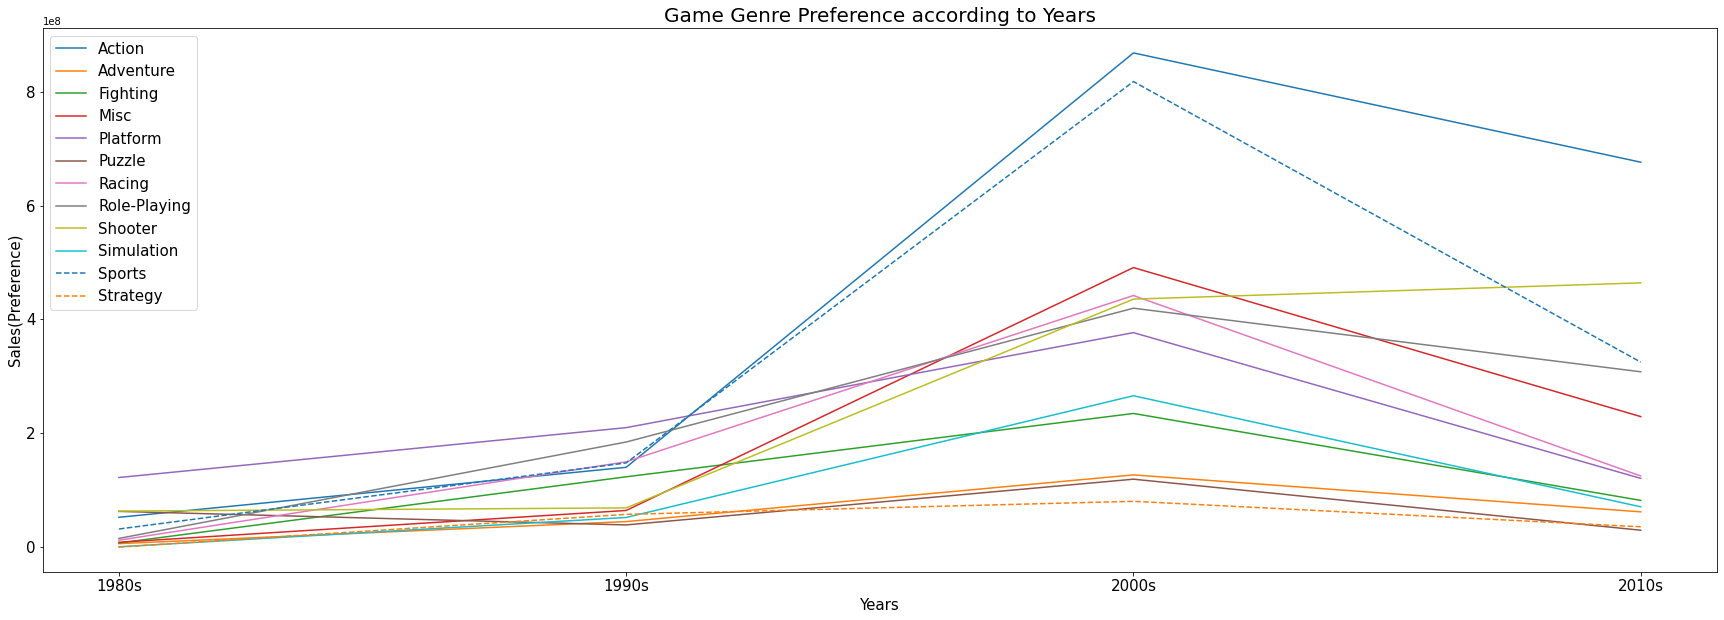

In [ ]:
plt.figure(figsize=(30,10))

plt.title('Game Genre Preference according to Years', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Sales(Preference)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in range(len(df2_years_cat.columns)-2):
  plt.plot(df2_years_cat.iloc[:,i], label=df2_years_cat.columns[i])
plt.plot(df2_years_cat.iloc[:,10], label=df2_years_cat.columns[10], ls='--')
plt.plot(df2_years_cat.iloc[:,11], label=df2_years_cat.columns[11], ls='--')

plt.legend(fontsize=15)
plt.show();

In [ ]:
# 90년대에서 2000년대로 넘어가는 시점에서 비디오 게임 시장은 급격하게 성장하였습니다. 2000년대에서 2010년대로 넘어가는 부분은 데이터 자체가 2016년도까지 정리되어있어 비교하는 것은 불가합니다.
# 다만 여기서 눈여겨 보이는 부분은, 데이터의 집계가 16년도까지라는 점과 전체적인 비디오 게임 출고량이 줄었음에도 불구하고 '슈터' 장르만 유일하게 이 자료에서조차 증가하는 것으로 확인된다는 점입니다.

### 3. 출고량이 높은 게임에 대한 분석 및 시각화 과정

In [ ]:
df3 = df.sort_values('Total_Sales', ascending=False).iloc[:100,:] # 상위 총 출고량 100위 게임에 대한 데이터를 만들어보겠습니다.

In [ ]:
df3_cat = pd.crosstab(df3['Genre'], df3['Publisher'])

In [ ]:
df3_cat.loc['Total', :] = df3_cat.sum()

In [ ]:
df3_cat

Publisher,Activision,Atari,Bethesda Softworks,Electronic Arts,Microsoft Game Studios,Nintendo,Sega,Sony Computer Entertainment,SquareSoft,Take-Two Interactive,Ubisoft
Genre,,,,,,,,,,,
Action,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Fighting,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Misc,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,2.0
Platform,0.0,0.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0
Puzzle,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Racing,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
Role-Playing,0.0,0.0,1.0,0.0,0.0,11.0,0.0,2.0,1.0,0.0,0.0
Shooter,14.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0


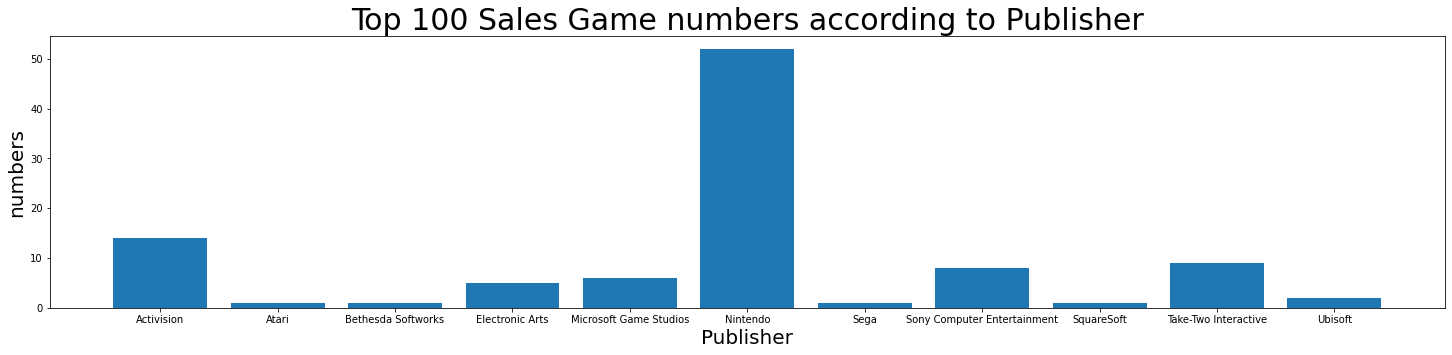

In [ ]:
plt.figure(figsize=(25,5))

plt.title('Top 100 Sales Game numbers according to Publisher', fontsize=30)
plt.xlabel('Publisher', fontsize=20)
plt.ylabel('numbers', fontsize=20)

plt.bar(df3_cat.columns, df3_cat.loc['Total']);

In [ ]:
# 게임을 출시하는 것은 가장 먼저 '제작사'의 영향이 클 것이라 생각했습니다. 지금 제가 어떤 회사에 소속되어 제작사 입장에서 게임을 퍼블리싱하려고 하듯이, 실제 모든 게임 제작사들이 같은 과정을 통해 나온 결과물들을 집계해놓은 것이기 때문입니다.
# 해서 출고량 Top100 게임들의 데이터에서, 제작사별로 Top100 게임들을 몇개 출시했고 어떤 장르에서 출시했는지가 궁금했습니다.
# 위의 표와 시각화 막대 차트를 보시면 닌텐도가 100개중 52개로 절반을 차지하고 그 뒤로 엑티비젼, 테이크 투 인터렉티브, 소니 등이 따라오고 있습니다. 여기서 독특한 점은 2위인 엑티비전의 경우 오로지 '슈터' 장르로만 2위를 차지하고 있다는 점입니다.
# 해서 한가지 가정을 더하고 아래 추가적인 데이터 분석을 진행해보겠습니다.

### 4. 회사 : 닌텐도, 팀 : 미래사업팀(새로운 수익원을 찾는 팀), 직급 : 사원
##### 위와 같은 상황이라고 가정하고 앞선 데이터에서 얻은 결과와 아래 새로운 분석을 통해 간단한 결론을 내어보겠습니다. 

#### 4-1. 제작사별 게임 출고량(경쟁사 체크)

In [ ]:
df3['Publisher'].unique() # 출고량 Top100인 회사들을 서치하였습니다.

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari'], dtype=object)

In [ ]:
df3_pub_sale = df3.groupby('Publisher').sum().drop('Year', axis=1)

In [ ]:
df3_pub_sale

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Activision,87050000.0,55520000.0,3430000.0,19930000.0,165930000.0
Atari,7280000.0,450000.0,0.0,80000.0,7810000.0
Bethesda Softworks,5030000.0,2860000.0,100000.0,850000.0,8840000.0
Electronic Arts,10540000.0,22950000.0,470000.0,5900000.0,39860000.0
Microsoft Game Studios,49000000.0,16470000.0,560000.0,5240000.0,71270000.0
Nintendo,439230000.0,246290000.0,177040000.0,57760000.0,920320000.0
Sega,2580000.0,3900000.0,660000.0,910000.0,8050000.0
Sony Computer Entertainment,30420000.0,23980000.0,15330000.0,13430000.0,83160000.0
SquareSoft,2280000.0,1720000.0,3630000.0,230000.0,7860000.0


In [ ]:
from scipy.stats import chi2_contingency

_, Pvalue3, _, _ = chi2_contingency(df3_pub_sale.drop('Total_Sales', axis=1))

In [ ]:
print(f'two-sample 카이제곱 검정 결과, pvalue가 {Pvalue3}으로 0.05보다 작으므로 귀무가설을 기각합니다. 게임 제작사와 지역은 연관이 있습니다.')

two-sample 카이제곱 검정 결과, pvalue가 0.0으로 0.05보다 작으므로 귀무가설을 기각합니다. 게임 제작사와 지역은 연관이 있습니다.


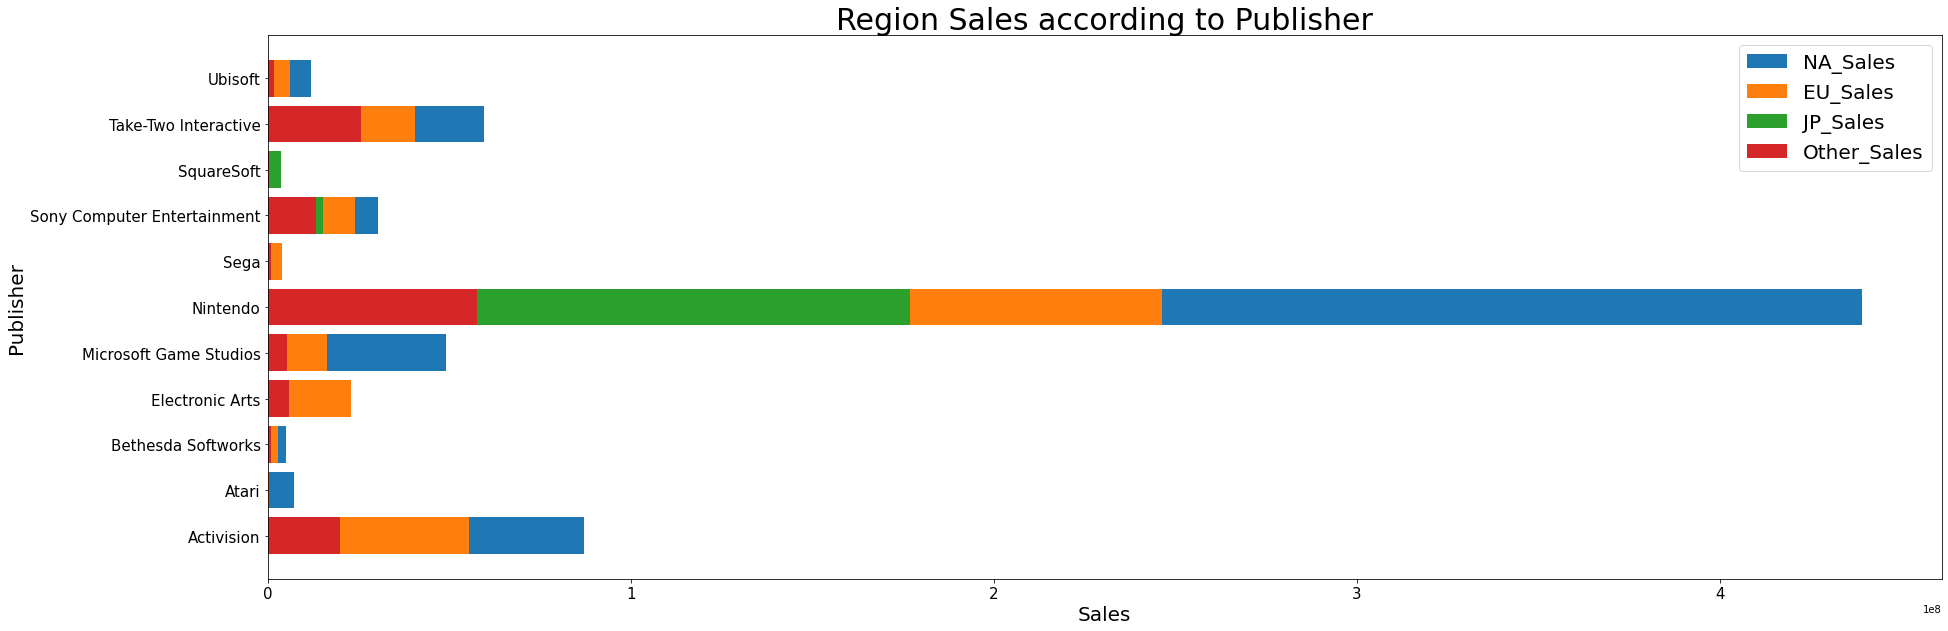

In [ ]:
plt.figure(figsize=(30,10))

plt.title('Region Sales according to Publisher', fontsize=30)
plt.xlabel('Sales', fontsize=20)
plt.ylabel('Publisher', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in range(4):
  plt.barh(df3_pub_sale.index, df3_pub_sale.iloc[:,i], label=df3_pub_sale.columns[i])

plt.legend(fontsize=20)
plt.show();

In [ ]:
# 닌텐도 게임들의 출고량이 압도적으로 높은 것을 알 수 있습니다. 특히 북미와 일본 시장에서 다른 제작사들에 비해 압도적입니다.
# 또 여기서 주목할 점은 2위인 엑티비젼의 경우, 일본 시장에 대한 점유율 없이 닌텐도 다음으로 상위 100개의 게임들 중 출고량이 많은 제작사라는 점입니다.

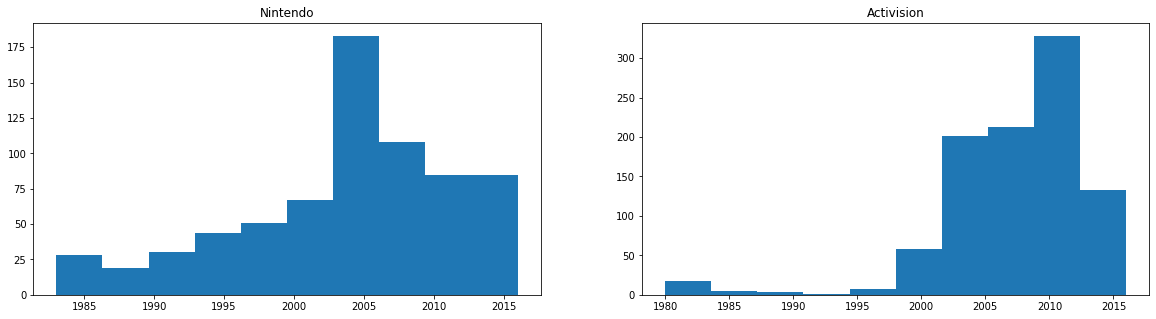

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.title('Nintendo')
plt.hist(df[df['Publisher'] == 'Nintendo']['Year']) 

plt.subplot(1,2,2)
plt.title('Activision')
plt.hist(df[df['Publisher'] == 'Activision']['Year']);

# 두 회사 모두 1900년 후반부터 게임을 제작하고 있으며 게임 수로만 보았을 때는 최근 엑티비젼이 닌텐도보다 약 2배의 게임을 제작하고 있습니다.

In [ ]:
df3[(df3['Publisher'] == 'Nintendo') & (df3['Year'] > 2010)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
32,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5170000.0,4050000.0,4340000.0,790000.0,14350000.0
42,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4740000.0,3910000.0,2670000.0,890000.0,12210000.0
49,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4230000.0,3370000.0,3080000.0,650000.0,11330000.0
53,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4890000.0,2990000.0,2130000.0,780000.0,10790000.0
64,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3660000.0,3070000.0,2470000.0,630000.0,9830000.0
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2010000.0,2320000.0,4360000.0,410000.0,9100000.0
81,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2910000.0,1860000.0,3140000.0,430000.0,8340000.0
97,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3240000.0,1350000.0,2420000.0,430000.0,7440000.0


In [ ]:
df3[(df3['Publisher'] == 'Activision') & (df3['Year'] > 2010)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5770000.0,5810000.0,350000.0,2310000.0,14240000.0
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4990000.0,5880000.0,650000.0,2520000.0,14040000.0
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8250000.0,4300000.0,70000.0,1120000.0,13740000.0
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5540000.0,5820000.0,490000.0,1620000.0,13470000.0
61,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6720000.0,2630000.0,40000.0,820000.0,10210000.0
67,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4090000.0,3730000.0,380000.0,1380000.0,9580000.0
93,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2800000.0,3300000.0,140000.0,1370000.0,7610000.0


In [ ]:
# 2010년 이후  출고량 상위 100개의 게임 중 각각 닌텐도와 엑티비젼의 게임을 나타낸 표입니다.
# 위의 두 표를 보시면, 닌텐도의 경우 플랫폼의 계열이 DS류입니다. 반면, 엑티비젼의 경우 장르는 전부 '슈터'로 플랫폼은 PS 혹은 X box 계열입니다. 여기서 도메인 지식을 통한 이 둘의 차이를 생각해보면
# DS류는 닌텐도 사의 플랫폼으로 휴대용 게임 플랫폼이며 PS 및 X box는 가정용 게임 플랫폼입니다.

In [ ]:
df[(df['Publisher'] == 'Nintendo') & (df['Year'] > 2010)]['Platform'].unique() # 2010년 후 출시된 닌텐도의 플랫폼을 보면 Wii라는 가정용 게임 플랫폼이 존재합니다. 

array(['3DS', 'DS', 'WiiU', 'Wii'], dtype=object)

In [ ]:
df[(df['Publisher'] == 'Nintendo') & (df['Genre'] == 'Shooter') & (df['Year'] > 2010)] # 2010년 이후 닌텐도의 슈터 장르 게임의 부진을 확인할 수 있습니다. 해서 플랫폼을 기준으로 데이터 분석을 실행하였습니다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
235,Splatoon,WiiU,2015.0,Shooter,Nintendo,1550000.0,1150000.0,1440000.0,430000.0,4570000.0
2174,Star Fox 64 3D,3DS,2011.0,Shooter,Nintendo,480000.0,270000.0,130000.0,70000.0,950000.0
5198,Star Fox: Zero,WiiU,2016.0,Shooter,Nintendo,160000.0,100000.0,70000.0,30000.0,360000.0


#### 4-2. 플랫폼 별 출고량

In [ ]:
df3.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [ ]:
df3_pla_sale = df3.groupby('Platform').sum().drop('Year', axis=1)

In [ ]:
df3_pla_sale

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
2600,7280000.0,450000.0,0.0,80000.0,7810000.0
3DS,27940000.0,21060000.0,21470000.0,4580000.0,75050000.0
DS,72660000.0,65140000.0,52080000.0,17300000.0,207180000.0
GB,66350000.0,27120000.0,31630000.0,3590000.0,128690000.0
GBA,10400000.0,6550000.0,8530000.0,850000.0,26330000.0
N64,22360000.0,8690000.0,5720000.0,690000.0,37460000.0
NES,70940000.0,8830000.0,11630000.0,1890000.0,93290000.0
PC,980000.0,6420000.0,0.0,710000.0,8110000.0
PS,16970000.0,13650000.0,12450000.0,2520000.0,45590000.0


In [ ]:
from scipy.stats import chi2_contingency

_, Pvalue4, _, _ = chi2_contingency(df3_pla_sale.drop('Total_Sales', axis=1))

In [ ]:
print(f'two-sample 카이제곱 검정 결과, pvalue가 {Pvalue4}으로 0.05보다 작으므로 귀무가설을 기각합니다. 게임 플랫폼과 지역은 연관이 있습니다.')

two-sample 카이제곱 검정 결과, pvalue가 0.0으로 0.05보다 작으므로 귀무가설을 기각합니다. 게임 플랫폼과 지역은 연관이 있습니다.


In [ ]:
# 여기서 의문이 들었습니다. 플랫폼은 어떤 변수보다 '시간'의 변수에 영향을 많이 받는다 생각했고 위와 같은 상위 종목 내에서의 분석보다, 전체 데이터에서 최근 플랫폼을 기준으로 분석하는 게 맞다 생각하였습니다.

In [ ]:
df[df['Year'] > 2010]['Platform'].unique() # 2017년까지의 데이터가 있다는 가정 하에 플랫폼의 수명은 길지 않으며 우리가 출시하려는 게임은 최신 플랫폼을 기반으로 하는 게 좋다는 판단하에 2011년도부터의 데이터를 살펴보기로 하였습니다.

array(['PS3', 'X360', '3DS', 'PS4', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [ ]:
# 이 때, 위의 값들 중 이전 시리즈의 플랫폼을 제외하면, 'PS4', 'XOne', 'WiiU','PC'(가정용) / 'PSV'. '3DS'(휴대용) 으로 나눌 수 있음을 도메인 서치를 통해 알 수 있었습니다.

In [ ]:
df_pla_sale = df[df['Year'] > 2010].groupby('Platform').sum().drop('Year', axis=1)

In [ ]:
df_pla_sale_main = df_pla_sale.loc[['PS4', 'XOne', 'WiiU', 'PC', 'PSV', '3DS'],:]

In [ ]:
df_pla_sale_main

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
PS4,96800000.0,123700000.0,14300000.0,43360000.0,278160000.0
XOne,83190000.0,45630000.0,340000.0,11920000.0,141080000.0
WiiU,38320000.0,24230000.0,12790000.0,6450000.0,81790000.0
PC,28840000.0,53950000.0,0.0,12470000.0,95260000.0
PSV,16070000.0,16270000.0,20810000.0,8410000.0,61560000.0
3DS,78030000.0,58290000.0,97300000.0,12550000.0,246170000.0


In [ ]:
from scipy.stats import chi2_contingency

_, Pvalue5, _, _ = chi2_contingency(df_pla_sale_main.drop('Total_Sales', axis=1))

In [ ]:
print(f'two-sample 카이제곱 검정 결과, pvalue가 {Pvalue5}으로 0.05보다 작으므로 귀무가설을 기각합니다. 게임 플랫폼과 지역은 연관이 있습니다.')

two-sample 카이제곱 검정 결과, pvalue가 0.0으로 0.05보다 작으므로 귀무가설을 기각합니다. 게임 플랫폼과 지역은 연관이 있습니다.


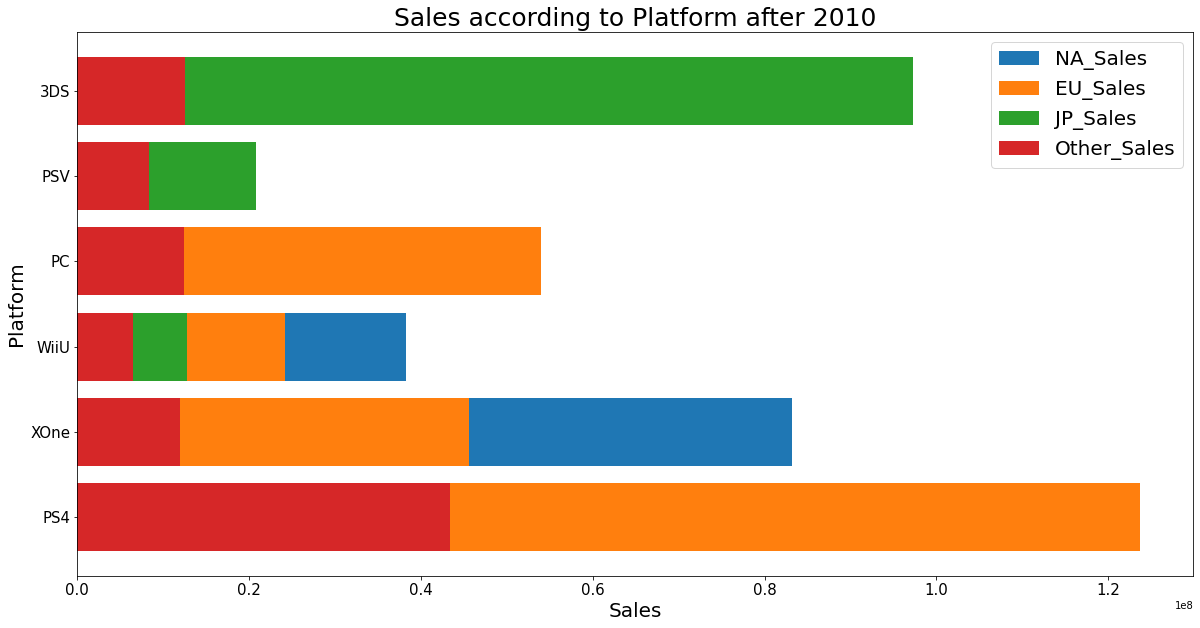

In [ ]:
plt.figure(figsize=(20,10))

plt.title('Sales according to Platform after 2010', fontsize=25)
plt.xlabel('Sales', fontsize=20)
plt.ylabel('Platform', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in range(4):
  plt.barh(df_pla_sale_main.index, df_pla_sale_main.iloc[:,i], label=df_pla_sale_main.columns[i]);
  
plt.legend(fontsize=20)
plt.show();

In [ ]:
# 보시는 것과 같이 2010년 이후 휴대용 게임 플랫폼인 3DS와 PSV는 일본시장에서 파이가 큰 반면, 가정용 게임 플랫폼 3가지(WiiU, XOne, PS4)에선 PS4가 유럽시장에서 압도적으로 큰 것을 확인할 수 있습니다.

여기까지 종합하였을 때, 
1. 지역에 따른 선호 장르 -> 북미, 유럽 시장 타겟 / 총출고량 기준 액션, 스포츠, 슈터 순이지만 총출고량 대비 비율로 했을 때 '슈터' 장르 유의할 것

2. 연도별 게임 트랜드 -> 2009년 전후로 비디오게임 출고량 자체는 줄어드는 것으로 판단. 단, 10년 기준으로 보았을 때, 2010년대 데이터가 부족함에도 '슈터' 장르만 증가.

3. 출고량 높은 게임들 분석 -> Top100 게임을 출시한 제작사들의 목록 확인. 닌텐도와 엑티비전 각각 1, 2위 확인

4. 닌텐도 회사 직원이라는 가정 하에 새로운 게임을 출시한다 가정
- 제작사 별 게임 출고량(경쟁사 분석)
  - 닌텐도가 압도적임에도 2위인 엑티비전은 일본 시장 없이 2위
  - 닌텐도는 휴대용 게임 플랫폼 위주, 엑티비전은 가정용 게임 플랫폼 위주

- 플랫폼 별 출고량(2010년도 이후)
  - 가정용 게임 플랫폼의 경우 유럽 및 북미에서 압도적으로 규모가 크다.

**결론**

가정용 게임 플랫폼 부문(Wii) :
닌텐도의 신작 게임의 장르는 'Shooter'이며 주 지역은 유럽 및 북미를 타겟으로 합니다. 

휴대용 게임 플랫폼 부분(DS)
닌텐도는 휴대용 게임 플랫폼을 위주로 하고 있는 만큼 더욱더 스마트폰과의 경쟁이 있을 것으로 판단되므로 출고량 상위권에 있는 휴대용 플랫폼 기반의 게임들을 스마트폰에 이식하여 플레이할 수 있도록 할 것이 요구됩니다.

### 5. PCA 및 클러스터링

In [ ]:
df_num = df.drop(['Name', 'Platform', 'Genre', 'Publisher'], axis=1)

In [ ]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_num)
    sum_of_squared_distances.append(km.inertia_)

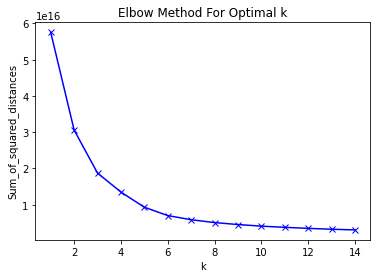

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show() # 즉, k=6으로 해도 되겠구나 싶음. (k=6부터 이후엔 거의 비슷하니까)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6)
kmeans.fit(df_num)
labels = kmeans.labels_

In [ ]:
labels

array([3, 5, 5, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA



scaler = StandardScaler()
Z = scaler.fit_transform(df_num)


pca = PCA(4)

pca.fit(Z)

B = pca.transform(Z)
print("\n Projected Data: \n", B)


 Projected Data: 
 [[ 1.00160837e+02  1.29986717e+01 -1.68798277e+01 -6.43959341e+00]
 [ 4.15821527e+01 -9.65252487e+00  1.03227565e+01 -1.65314933e+01]
 [ 4.35151852e+01  3.02788402e+00 -7.15867307e-01 -8.69610536e-01]
 ...
 [-6.53187920e-01  9.12735979e-02 -1.02288553e-02  3.02718567e-03]
 [-6.83105865e-01  7.01570668e-01  2.91371752e-01 -5.27746381e-02]
 [-6.73307279e-01  2.41312235e-01  6.73274323e-02 -8.51516775e-03]]


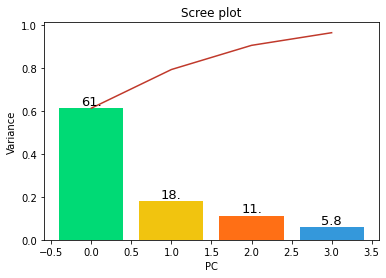

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

In [ ]:
B_main2 = pd.DataFrame(B, columns=['PC1', 'PC2', 'PC3', 'PC4']).drop(['PC3', 'PC4'], axis=1)

In [ ]:
B_main2

,PC1,PC2
0,100.160837,12.998672
1,41.582153,-9.652525
2,43.515185,3.027884
3,39.469613,2.870845
4,37.338411,-10.180033
...,...,...
16308,-0.712011,1.297606
16309,-0.667134,0.382161
16310,-0.653188,0.091274
16311,-0.683106,0.701571


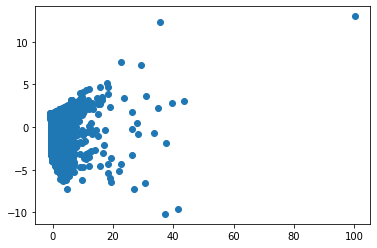

In [ ]:
plt.scatter(B_main2.PC1, B_main2.PC2)
plt.show()

In [ ]:
B_main2['Label'] = labels

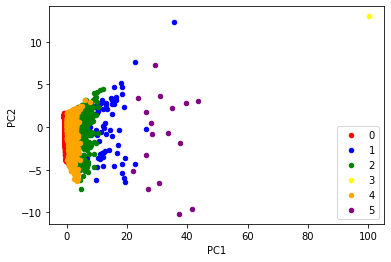

In [ ]:
grouped = B_main2.groupby('Label')
fig, ax = plt.subplots()
colors = {0 : 'r', 1 : 'b', 2 : 'g', 3 : 'yellow', 4 : 'orange', 5 : 'purple'}
for key, group in grouped:
    group.plot(ax=ax, kind = 'scatter', x = 'PC1', y = 'PC2', label = key, color=colors[key])

In [ ]:
df['Label'] = labels

In [ ]:
df[(df['Label'] == 1) | (df['Label'] == 5)  & (df['Year'] > 2010)].groupby('Genre').sum().sort_values('Total_Sales', ascending=False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Label
Genre,,,,,,,
Shooter,34162.0,113710000.0,61030000.0,3720000.0,20820000.0,199280000.0,17
Action,18072.0,61190000.0,40420000.0,7110000.0,24610000.0,133330000.0,13
Role-Playing,18055.0,45720000.0,32140000.0,34140000.0,6880000.0,118880000.0,9
Platform,17994.0,57420000.0,25430000.0,22100000.0,4780000.0,109730000.0,9
Racing,16010.0,34550000.0,24360000.0,16720000.0,13050000.0,88680000.0,8
Misc,12053.0,30490000.0,22310000.0,7750000.0,6100000.0,66650000.0,6
Puzzle,3987.0,10720000.0,5810000.0,5320000.0,1260000.0,23110000.0,2
Simulation,4017.0,4560000.0,5840000.0,9690000.0,1290000.0,21380000.0,2
Fighting,2008.0,6750000.0,2610000.0,2660000.0,1020000.0,13040000.0,1


In [ ]:
# 슈터 계열의 총 출고량이 높은 것을 확인할 수 있습니다.